In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
%matplotlib inline

<div id="rmse" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="https://miro.medium.com/max/327/1*9hQVcasuwx5ddq_s3MFCyw.gif" style="align:center"/> </div>
  <div style="float:left;width: 85%;"><label></label></div>
</div>

## Departamentos

In [4]:
df_depto= pd.read_csv('df_depto.csv')

In [5]:
X = df_depto[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco']]
y = df_depto.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

In [ ]:
X = df_depto[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco']]
y = df_depto.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

X = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                          3.336e+04
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        22:29:57   Log-Likelihood:                     -5.5409e+05
No. Observations:               42408   AIC:                                  1.108e+06
Df Residuals:                   42403   BIC:                                  1.108e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  2252.9569     12.101    186.178      0.000    2229.238    2276.675
lat                    2558.4365    279.238      9.162      0.000    2011.125    3105.748
lon                    1450.0832    168.863      8.587      0.000    1119.108    1781.059
precio_m2                90.8579      0.629    144.537      0.000      89.626      92.090
distance_obelisco        -0.0010      0.003     -0.296      0.767      -0.007       0.005
==============================================================================
Omnibus:                    35578.703   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2436965.382
Skew:                           3.634   Prob(JB):                         0.00
Kurtosis:                      39.419   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_depto = mean_squared_error(y_test, predictions, squared= False)

print (mean_absolute_error(y_test, predictions))
print(r2)
RMSE_depto

51166.820623823965
0.6272883361682748


113552.62781457411

In [ ]:
X = df_depto[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2']]
y = df_depto.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

X = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                          4.170e+04
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        22:36:57   Log-Likelihood:                     -5.5409e+05
No. Observations:               42408   AIC:                                  1.108e+06
Df Residuals:                   42404   BIC:                                  1.108e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  2252.9031     12.100    186.196      0.000    2229.188    2276.619
lat                    2510.8069    228.192     11.003      0.000    2063.547    2958.067
lon                    1482.2608    129.202     11.472      0.000    1229.023    1735.498
precio_m2                90.9198      0.593    153.348      0.000      89.758      92.082
==============================================================================
Omnibus:                    35576.733   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2437083.833
Skew:                           3.634   Prob(JB):                         0.00
Kurtosis:                      39.420   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_depto = mean_squared_error(y_test, predictions, squared= False)

print (mean_absolute_error(y_test, predictions))
print(r2)
RMSE_depto

51151.081519332154
0.6272941026446406


113551.74938609863

In [6]:
from lazypredict.Supervised import LazyRegressor

In [7]:
rg = LazyRegressor(verbose=0,ignore_warnings=False,  custom_metric=None)
models_test,predictions_test = rg.fit(X_train, X_test, y_train, y_test)

 26%|██▌       | 11/42 [00:53<04:57,  9.61s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 6.70 GiB for an array with shape (899198028,) and data type float64


 40%|████      | 17/42 [10:02<1:05:01, 156.05s/it]

KernelRidge model failed to execute
Unable to allocate 13.4 GiB for an array with shape (42408, 42408) and data type float64


100%|██████████| 42/42 [15:17<00:00, 21.85s/it]


In [8]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.89,0.89,62180.08,2.58
ExtraTreesRegressor,0.88,0.88,63554.27,9.86
RandomForestRegressor,0.88,0.88,63832.52,19.87
LGBMRegressor,0.88,0.88,64081.14,0.56
HistGradientBoostingRegressor,0.88,0.88,64459.14,3.16
BaggingRegressor,0.87,0.87,67021.37,2.06
GradientBoostingRegressor,0.84,0.84,75310.06,6.20
KNeighborsRegressor,0.82,0.82,79505.73,0.36
DecisionTreeRegressor,0.80,0.80,83243.08,0.43


In [14]:
import xgboost as xgb

In [18]:
rg_xgb = xgb.XGBRegressor()
rg_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_set=[(X_test,y_test)])

[0]	validation_0-rmse:190665.53125
[1]	validation_0-rmse:148110.64062
[2]	validation_0-rmse:119460.35938
[3]	validation_0-rmse:101770.35156
[4]	validation_0-rmse:90500.03906
[5]	validation_0-rmse:83395.94531
[6]	validation_0-rmse:79539.80469
[7]	validation_0-rmse:75804.18750
[8]	validation_0-rmse:73309.60938
[9]	validation_0-rmse:71771.38281
[10]	validation_0-rmse:70896.60938
[11]	validation_0-rmse:69757.71875
[12]	validation_0-rmse:69331.55469
[13]	validation_0-rmse:69006.78906
[14]	validation_0-rmse:68705.35938
[15]	validation_0-rmse:68454.22656
[16]	validation_0-rmse:68360.40625
[17]	validation_0-rmse:68193.35938
[18]	validation_0-rmse:67460.67969
[19]	validation_0-rmse:67423.87500
[20]	validation_0-rmse:67389.08594
[21]	validation_0-rmse:67354.92188
[22]	validation_0-rmse:67173.64062
[23]	validation_0-rmse:67131.95312
[24]	validation_0-rmse:67131.96875
[25]	validation_0-rmse:67020.53125
[26]	validation_0-rmse:66402.65625
[27]	validation_0-rmse:66383.17969
[28]	validation_0-rmse:662

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Casas

In [64]:
df_casa= pd.read_csv('df_casa.csv')

In [65]:
X = df_casa[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco']]
y = df_casa.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

X = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                          1.996e+04
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:36:46   Log-Likelihood:                     -3.1856e+05
No. Observations:               23506   AIC:                                  6.371e+05
Df Residuals:                   23501   BIC:                                  6.372e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1373.8055      9.294    147.816      0.000    1355.589    1392.022
lat                     357.1732    545.437      0.655      0.513    -711.919    1426.265
lon                    2131.5307    329.705      6.465      0.000    1485.288    2777.773
precio_m2               139.7279      1.754     79.651      0.000     136.289     143.166
distance_obelisco        -0.0250      0.006     -4.509      0.000      -0.036      -0.014
==============================================================================
Omnibus:                    15832.918   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           733136.936
Skew:                           2.665   Prob(JB):                         0.00
Kurtosis:                      29.835   Cond. No.                     1.79e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_casa = mean_squared_error(y_test, predictions, squared= False)


print(r2)
RMSE_casa

0.5873683344652296


182784.25387324806

In [67]:
X = df_casa[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2']]
y = df_casa.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

X = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                          2.492e+04
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:36:46   Log-Likelihood:                     -3.1857e+05
No. Observations:               23506   AIC:                                  6.372e+05
Df Residuals:                   23502   BIC:                                  6.372e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1376.9009      9.272    148.493      0.000    1358.726    1395.076
lat                   -1123.5880    435.676     -2.579      0.010   -1977.541    -269.635
lon                    3101.3225    249.998     12.405      0.000    2611.311    3591.334
precio_m2               141.0238      1.731     81.457      0.000     137.630     144.417
==============================================================================
Omnibus:                    15731.990   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           725257.028
Skew:                           2.641   Prob(JB):                         0.00
Kurtosis:                      29.695   Cond. No.                         586.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_casa = mean_squared_error(y_test, predictions, squared= False)


print(r2)
RMSE_casa

0.5874257090117163


182771.54577408815

## Store

In [69]:
df_store = pd.read_csv('df_store.csv')

In [70]:
X = df_store[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco']]
y = df_store.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

X = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              1551.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:36:47   Log-Likelihood:                         -30447.
No. Observations:                2195   AIC:                                  6.090e+04
Df Residuals:                    2190   BIC:                                  6.093e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2   982.2641     17.627     55.724      0.000     947.696    1016.832
lat                   -1299.0881   2270.714     -0.572      0.567   -5752.066    3153.890
lon                    2316.6064   1347.686      1.719      0.086    -326.271    4959.484
precio_m2               113.1134      4.558     24.818      0.000     104.176     122.051
distance_obelisco         0.0331      0.020      1.672      0.095      -0.006       0.072
==============================================================================
Omnibus:                      727.348   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8323.958
Skew:                           1.225   Prob(JB):                         0.00
Kurtosis:                      12.220   Cond. No.                     1.88e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_store = mean_squared_error(y_test, predictions, squared= False)


print(r2)
RMSE_store

0.5963109828204173


280648.9723070141

In [72]:
X = df_store[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2']]
y = df_store.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

X = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              1937.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:36:47   Log-Likelihood:                         -30448.
No. Observations:                2195   AIC:                                  6.090e+04
Df Residuals:                    2191   BIC:                                  6.093e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2   980.0968     17.587     55.729      0.000     945.608    1014.585
lat                     503.9140   1999.234      0.252      0.801   -3416.679    4424.507
lon                    1097.3546   1133.895      0.968      0.333   -1126.268    3320.977
precio_m2               111.3384      4.434     25.109      0.000     102.643     120.034
==============================================================================
Omnibus:                      726.374   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8241.874
Skew:                           1.226   Prob(JB):                         0.00
Kurtosis:                      12.171   Cond. No.                         941.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_store = mean_squared_error(y_test, predictions, squared= False)


print(r2)
RMSE_store

0.5973977528042905


280270.950592428

## PH

In [73]:
df_ph= pd.read_csv('df_ph.csv')

In [74]:
X = df_ph[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2','distance_obelisco']]
y = df_ph.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

X = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              5898.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:38:30   Log-Likelihood:                         -41145.
No. Observations:                3360   AIC:                                  8.230e+04
Df Residuals:                    3355   BIC:                                  8.233e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1068.2242     18.528     57.655      0.000    1031.897    1104.552
lat                    2092.5939    458.195      4.567      0.000    1194.224    2990.964
lon                    -609.0612    279.918     -2.176      0.030   -1157.888     -60.234
precio_m2                56.6358      1.433     39.536      0.000      53.827      59.445
distance_obelisco        -0.0395      0.004     -8.856      0.000      -0.048      -0.031
==============================================================================
Omnibus:                      483.837   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6740.384
Skew:                           0.123   Prob(JB):                         0.00
Kurtosis:                       9.934   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_ph = mean_squared_error(y_test, predictions, squared= False)


print(r2)
RMSE_ph

0.6235234981847843


48464.13096764072

In [76]:
X = df_ph[['surface_covered_in_m2', 'lat', 'lon', 'precio_m2']]
y = df_ph.price_aprox_usd

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 7)

X = sm.add_constant(X_train)

lm = sm.OLS(y_train, X_train).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        price_aprox_usd   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              7187.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):                        0.00
Time:                        18:38:31   Log-Likelihood:                         -41184.
No. Observations:                3360   AIC:                                  8.238e+04
Df Residuals:                    3356   BIC:                                  8.240e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_covered_in_m2  1091.2213     18.556     58.808      0.000    1054.840    1127.603
lat                     367.4987    419.484      0.876      0.381    -454.972    1189.969
lon                     560.7476    249.622      2.246      0.025      71.321    1050.174
precio_m2                58.4027      1.435     40.704      0.000      55.590      61.216
==============================================================================
Omnibus:                      482.352   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6983.472
Skew:                           0.046   Prob(JB):                         0.00
Kurtosis:                      10.062   Cond. No.                         890.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
predictions = lm.predict(X_test)

r2 = r2_score(y_test, predictions)
RMSE_ph = mean_squared_error(y_test, predictions, squared= False)


print(r2)
RMSE_ph

0.611875324831191


49208.15924073922

In [78]:
rmse_dict = {'RMSE_ph' :RMSE_ph  , 'RMSE_casa':RMSE_casa, 'RMSE_depto':RMSE_depto, 'RMSE_store':RMSE_store}
rmse_dict

{'RMSE_ph': 49208.15924073922,
 'RMSE_casa': 182771.54577408815,
 'RMSE_depto': 113551.74938609863,
 'RMSE_store': 280648.9723070141}

In [91]:
rmse_lin_sim = {'RMSE_ph': 59469.83859982286,
 'RMSE_casa': 207789.8164531222,
 'RMSE_depto': 143010.67744201142,
 'RMSE_store': 325224.0913412817,
 'RMSE': 222461.49617835652}

In [89]:
equis = list(rmse_dict.keys()) + list(rmse_lin_sim.keys())
ye = list(rmse_dict.values()) + list(rmse_lin_sim.values())

<BarContainer object of 5 artists>

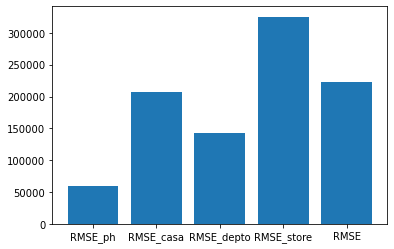

In [ ]:
plt.bar(list(rmse_dict.keys()), list(rmse_dict.values()), align='center')

<ipython-input-107-076ba8f0c901>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0] + list(rmse_lin_sim.keys()))


[Text(-1.0, 0, '0'),
 Text(0.0, 0, 'RMSE_ph'),
 Text(1.0, 0, 'RMSE_casa'),
 Text(2.0, 0, 'RMSE_depto'),
 Text(3.0, 0, 'RMSE_store'),
 Text(4.0, 0, 'RMSE'),
 Text(5.0, 0, '')]

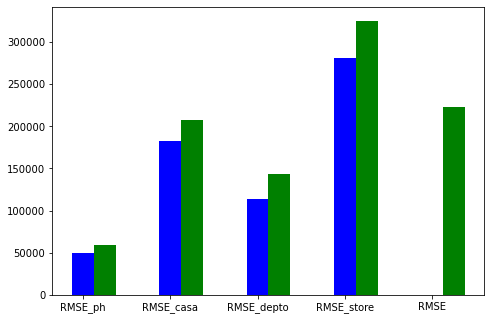

In [107]:
data = [list(rmse_dict.values())+[0],
list(rmse_lin_sim.values())]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.set_xticklabels([0] + list(rmse_lin_sim.keys()))
